In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [2]:
gold_dataset = pd.read_csv('/content/gold_price_data.csv')

In [3]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_dataset.shape

(2290, 6)

In [6]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_dataset.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [8]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
numeric_columns = gold_dataset.select_dtypes(include=['float64', 'int64'])
correlation = numeric_columns.corr()
print(correlation)


              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

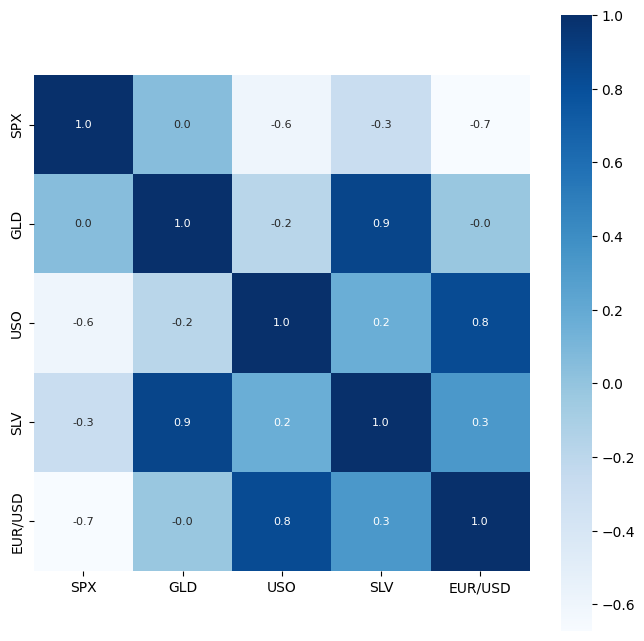

In [12]:
#constructing a heat map to understand correlation
plt.figure(figsize =(8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws={'size':8},cmap ='Blues')

In [13]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-15-2885a0b83bf1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'], color ='green')


<Axes: xlabel='GLD', ylabel='Density'>

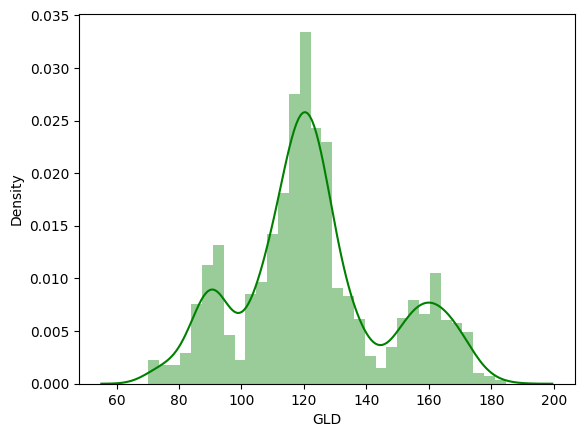

In [15]:
#checking the distribution of the GLD price
sns.distplot(gold_dataset['GLD'], color ='green')

Splitting the feature and target

In [16]:
X = gold_dataset.drop(['Date','GLD'],axis =1)

In [17]:
Y = gold_dataset['GLD']

In [18]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [19]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y,test_size = 0.2, random_state =2)

Model training : random Forest regressor

In [21]:
regressor = RandomForestRegressor(n_estimators = 100)

In [22]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [23]:
test_data_prediction = regressor.predict(X_test)

In [24]:
print(test_data_prediction)

[168.7231992   81.84419962 116.16800056 127.51700061 120.48060165
 154.67439833 150.41339883 126.25600028 117.30909883 126.07610035
 116.66270064 171.70870103 141.68969941 167.89529846 115.09100013
 117.50450044 136.3702031  170.1646006  159.87260249 157.63400011
 155.10830027 124.80599977 176.87390071 157.07540285 125.31320025
  93.80289972  77.18040038 120.36240003 119.09089911 167.36870054
  88.34110046 125.29470009  91.28150093 117.90849988 121.07559884
 136.28910103 115.45020129 114.84100087 148.66929943 107.09040075
 104.43800252  87.15049771 126.51090082 117.87819952 154.20279881
 119.5953002  108.22279989 107.92999828  93.11080018 127.03559835
  75.38690021 113.66199925 121.0604002  111.36259904 118.87849885
 120.57449955 159.3194999  167.832601   146.94589704  85.94559855
  94.2261003   86.78339873  90.60520002 119.05540088 126.45270087
 127.56440012 169.67610038 122.30439923 117.34109904  98.77680052
 168.52820071 143.35289816 131.45560265 121.14370185 121.45259925
 119.73090

In [25]:
error_score = metrics.r2_score(Y_test, test_data_prediction)

In [26]:
print("R2 score :", error_score)

R2 score : 0.9894711210041733


Comapre the actual values and predicted plot

In [27]:
Y_test = list(Y_test)

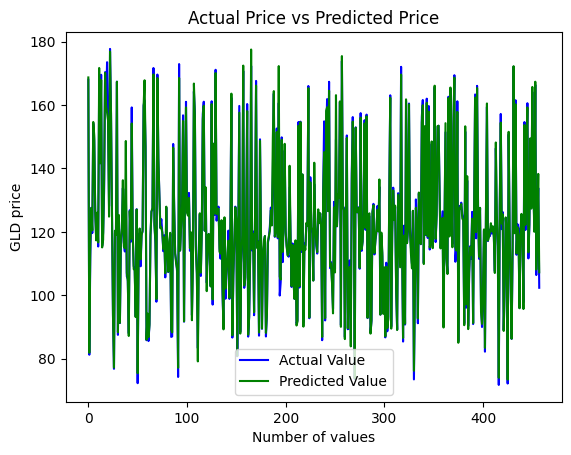

In [32]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of values")
plt.ylabel('GLD price')
plt.legend()
plt.show()